In [34]:
import matplotlib.pyplot as plt
import numpy as np
import sys,os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import importlib

# sys.path.append(os.getcwd()+'/A3lib')
# from A3lib import utils as a3ut 
# importlib.reload(a3ut)

In [35]:
def plot_history(history, title="Training History"):
    """
    Plot the training history of a model.

    Args:
        history (list): List of loss values at each iteration.
        title (str): Title of the plot.
    """
    plt.plot(history)
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()


def accuracy(X, Y, Y_pred):
    correct = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        if Y_pred[i] == Y[i]:
            correct += 1
            print(f"my_xor4({x1},{x2}) predicted: {Y_pred[i]}, correct {Y[i]}")
        else:
            print(f"my_xor4({x1},{x2}) predicted: {Y_pred[i]}, but should be {Y[i]}")
    return correct / len(X)


def plot3d_(Z, A, B, show_colorbar=True):
    """
    Plots a 3D surface of function f(x1, x2) over meshgrid A, B with MATLAB-like orientation.
    
    Parameters:
    - f: function of (x1, x2)
    - A, B: meshgrid arrays
    - show_colorbar: whether to display the color bar
    """
    # Create a vectorized version of the function
    # if not hasattr(f, 'vectorized'):
    #     f_vec = np.vectorize(f)
    # else:
    #     f_vec = f
    
    # Apply function to each element in the meshgrid
    

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surf = ax.plot_surface(A, B, Z, cmap='viridis', edgecolor='k')

    # Set axes labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')


    # Set viewing angle: azim=-135, elev=30 gives MATLAB-style view with (0,0) front left
    ax.view_init(elev=30, azim=-135)

    # Add tighter colorbar
    if show_colorbar:
        # Create colorbar next to the plot (adjust size and position)
        mappable = plt.cm.ScalarMappable(cmap='viridis')
        mappable.set_array(Z)
        fig.colorbar(mappable, ax=ax, shrink=0.6, pad=0.1)

    # Clean layout
    plt.title('3D Surface Plot')
    plt.tight_layout()
    
    return fig

## 1. Prepare the XOR Dataset 

In [36]:

# XOR inputs and outputs
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([0, 1, 1, 0])



## Backpropagation

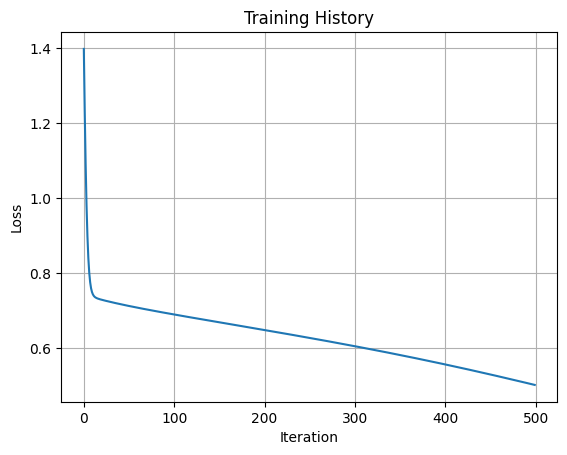

my_xor4(0,0) predicted: 0, correct 0
my_xor4(0,1) predicted: 1, correct 1
my_xor4(1,0) predicted: 1, correct 1
my_xor4(1,1) predicted: 0, correct 0


1.0

In [37]:

X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
Y = np.array([0, 1, 1, 0])


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def init_ws(Nfeatures=2):
    ws = {
        'W1': np.random.randn(32, Nfeatures),
        'b1': np.zeros(32),
        'W2': np.random.randn(32),
        'b2': 0,
    }
    return ws

def forward(X, ws):
   
    # Layer 1
    Z1 = np.dot(X, ws['W1'].T) + ws['b1']
    H = sigmoid(Z1)
    
    # Layer 2
    Z2 = np.dot(H, ws['W2']) + ws['b2']

    # Output layer
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1

def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward(X, weights)
    # loss function, cross entropy
    L = (1/N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y)) 
    # L = np.sum((Y - Y_T) ** 2) / N_points
    # back propagation
    dLdY = 1/N_points * np.divide(Y - Y_T, np.multiply(Y, 1-Y))
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 32))
    
    dLdZ1 = np.multiply(dLdH, np.multiply(sigmoid(Z1), (1-sigmoid(Z1))))
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

ws = init_ws()
initWS = np.copy(ws)
def train_(X, Y, epochs=500, lr=1.5):
    loss_history = []
    for epoch in range(epochs):
        gradients, loss = back_propagation(X, Y, ws)
        for w in ws:
            ws[w] -= lr * gradients[w]
        loss_history.append(loss)
    return loss_history

loss_history = train_(X, Y, epochs=500, lr=0.1)
plot_history(loss_history)   
# print("Final Loss: ", loss_history)
Y_pred, Z2, H, Z1 =  forward(X, ws) # final weights

# print("Final Output: ", [round(i) for i in Y_pred])

accuracy(X, Y, [round(i) for i in Y_pred])





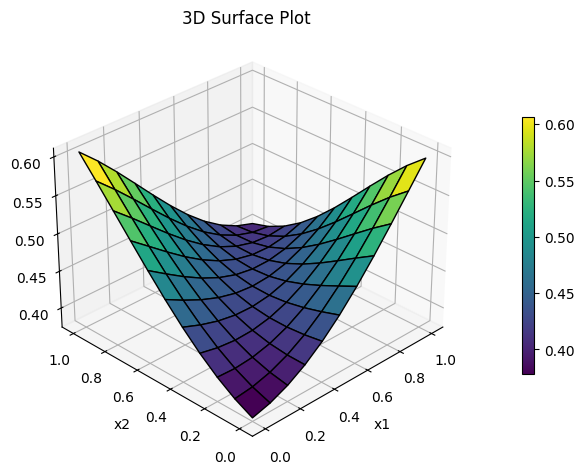

In [38]:
x = np.arange(0, 1.1, 0.1)

A, B = np.meshgrid(x, x)


# Flatten A and B to prepare inputs
grid_inputs = np.column_stack((A.ravel(), B.ravel()))
# print(grid_inputs)
# Compute predictions using the trained model
Z_vals, _, _, _ = forward(grid_inputs, ws)
# print(Z_vals.reshape(A.shape))
plot3d_(Z_vals.reshape(A.shape), A, B, show_colorbar=True)

plt.show()